In [13]:
import pandas as pd
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [120]:


regex = re.compile('[^a-zA-Z ]')

for col in ['title', 'author_fullname', 'selftext']:
    wsb[col] = wsb[col].apply(lambda x : regex.sub('', str(x) ))

In [132]:
wsb_text = wsb[wsb["is_self"] == True]
wsb = pd.read_pickle('../may_wsb.pkl')

wsb[wsb.score >= 20]

wsb.sort_values(by = "score", ascending = False).head(10)

,title,id,created_utc,author_fullname,is_self,score,upvote_ratio,total_awards_received,selftext,url
2493,HOLDGME,n5vldf,1620263260,t2_5syqfl4h,False,59820,0.86,199,,https://i.redd.it/jwhf5yp0hex61.jpg
3323,Monster Crash,n5lboc,1620235294,t2_1jew76qz,False,53509,0.89,362,,https://v.redd.it/shekh7yq5cx61
3844,VLAD,n5g278,1620221695,t2_1jdyhbma,False,50248,0.90,176,,https://i.redd.it/yos8j48d1bx61.jpg
7923,WSB analyzes some charts,n3dujk,1619983656,t2_9js0dd4x,False,46432,0.85,432,,https://v.redd.it/2qjyeacadrw61
1719,The Insurrection of the Apes,n63q7n,1620294990,t2_a2jxbzsv,False,40180,0.89,251,,https://v.redd.it/xl5x239t2hx61
514,When will the dip dip???,n6f0w5,1620328286,t2_5ulprski,False,37401,0.94,111,,https://i.redd.it/isenlnv9ujx61.jpg
6565,Heard it cost 200k in losses to join this grou...,n44mxh,1620069224,t2_8clkgq79,False,31855,0.90,231,,https://www.reddit.com/gallery/n44mxh
1071,We’ve been compromised!,n69ajb,1620313307,t2_11cvrlt5,False,29831,0.92,164,,https://v.redd.it/5zfzinkrlix61
7425,A Foolproof Investment,n3rb5l,1620031140,t2_35lpjzqy,False,28824,0.94,106,,https://v.redd.it/oq5e5yvoavw61
8640,"It’s simple. As for me, I like the stock💎🤲🦍",n2rw1m,1619904334,t2_yr5ck,False,27182,0.86,334,,https://v.redd.it/5bfm8ziltkw61


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [121]:


#corpus = list( wsb_text["title"])

corpus = list(wsb["author_fullname"])
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())

<AxesSubplot:xlabel='predicted', ylabel='true'>

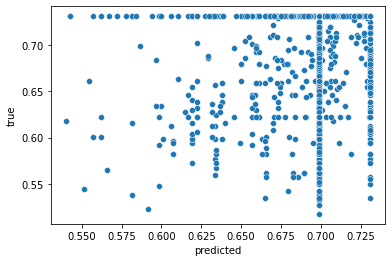

In [124]:
def sigmoid(x):
    return 1/ ( 1 + np.exp(-x))

def logit(x):
    if x != 0:
        return x/(1 - x)
    else:
        return -999999999 # ...

y = list(map ( lambda x : sigmoid(x)  , wsb.upvote_ratio))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf = LinearRegression().fit(X_train, y_train)

results = pd.DataFrame()

results["predicted"] = clf.predict(X_test)
results["true"] = y_test
sns.scatterplot(data = results, x = "predicted", y = "true")


,title,id,created_utc,author_fullname,is_self,score,upvote_ratio,total_awards_received,selftext,url
4,Sad 😔,n6lecl,1620345402,t2_5qd02awb,False,36,0.86,0,,https://i.redd.it/ciguyky99lx61.jpg
22,$AMC YOLO update : 4648 shares across 4 accoun...,n6l5j3,1620344665,t2_abbovfgf,False,117,0.84,1,,https://www.reddit.com/gallery/n6l5j3
29,Losses to the max: it was a fun ride boys,n6l16e,1620344290,t2_agj0s4oc,False,36,0.89,1,,https://i.redd.it/nelitb1w5lx61.png
48,I’ve started researching the cause and effects...,n6ktxj,1620343715,t2_607eb7ub,False,25,0.84,0,,https://i.redd.it/l7xj9j994lx61.jpg
121,Do you ever guess how many shares you should b...,n6js08,1620340736,t2_l6epqn4,False,22,0.89,0,,https://drive.google.com/file/d/1_g2iBZu1hvs1m...
...,...,...,...,...,...,...,...,...,...,...
9303,The meme stonk left standing,n28jja,1619833699,t2_8fh7ou85,False,33,0.95,0,,https://v.redd.it/mtwdcemnzew61
9312,RIOT update 🚀💎✋,n28dd2,1619833066,t2_9enxwml9,False,38,0.85,1,,https://i.redd.it/363bq15uxew61.jpg
9315,Inflation and yield,n28cq5,1619833001,t2_a8j7opry,True,372,0.89,8,Nothing has changed over the past week. The Fe...,https://www.reddit.com/r/wallstreetbets/commen...
9320,Accenture says the gaming industry is worth 30...,n289bw,1619832655,t2_4s91q6c1,False,1157,0.97,1,,https://news.yahoo.com/gaming-industry-worth-3...


[[   0    0    0 ...  602  295   78]
 [   0    0    0 ...  450   10  127]
 [   0    0    0 ...    1  124  127]
 ...
 [   0    0    0 ...  212   70  433]
 [   0    0    0 ...    0  469 1680]
 [   0    0    0 ...  137   93 2709]]


In [39]:
#

In [87]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())

In [86]:

#print(vectorizer2.get_feature_names())

In [89]:
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearRegression()),
])

In [113]:
#https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

def sigmoid(x):
    return 1/ ( 1 + np.exp(-x))

y = list(map ( lambda x : sigmoid(x)  , wsb_text.upvote_ratio))
X_train, X_test, y_train, y_test = train_test_split(X2.toarray(), y, test_size=0.33, random_state=42)


clf = LinearRegression(positive=True).fit(X_train, y_train)


<AxesSubplot:xlabel='predicted', ylabel='true'>

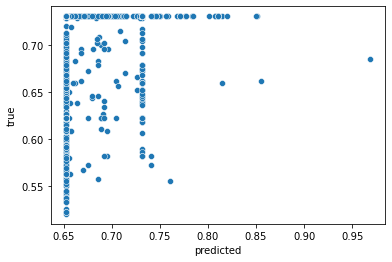

In [116]:

results = pd.DataFrame()
results["predicted"] = clf.predict(X_test)
results["true"] = y_test
sns.scatterplot(data = results, x = "predicted", y = "true")


In [106]:
wsb_text.score.describe()

count     4992.000000
mean        18.896635
std        323.637532
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      19066.000000
Name: score, dtype: float64